<a href="https://colab.research.google.com/github/rpasquini/urban-econometrics/blob/master/Regression_Discontinuity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install linearmodels
import pandas as pd
#from scipy import stats  
#import numpy as np
#from sklearn.neighbors import KNeighborsRegressor
#from linearmodels.iv import IV2SLS
import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/matheusfacure/python-causality-handbook/master/data/drinking.csv')
df.columns

Index(['agecell', 'all', 'allfitted', 'internal', 'internalfitted', 'external',
       'externalfitted', 'alcohol', 'alcoholfitted', 'homicide',
       'homicidefitted', 'suicide', 'suicidefitted', 'mva', 'mvafitted',
       'drugs', 'drugsfitted', 'externalother', 'externalotherfitted'],
      dtype='object')

**agecell** :  Edad de la celda correspondiente. La celda hace referencia a un intervalo de edad donde se calcula el promedio de fallecimientos por causa. \

**all**: Tasa de fallecimiento total

**mva**:  (moving vehicle accident) fallecimiento en automotor 

**suicide**: fallecimiento por suicidio. \


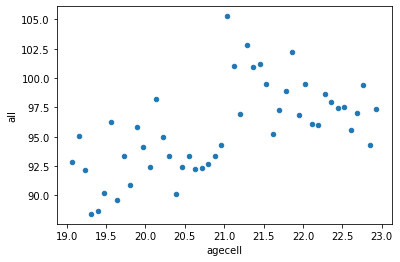

In [3]:
df.plot.scatter(x="agecell", y="all")

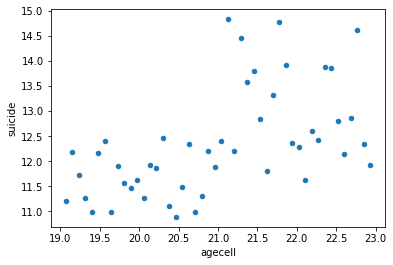

In [4]:
df.plot.scatter(x="agecell", y="suicide")

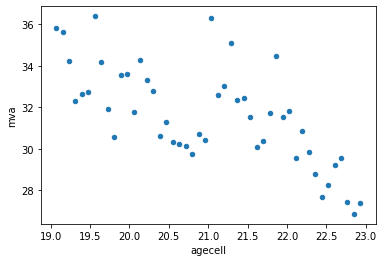

In [5]:
df.plot.scatter(x="agecell", y="mva")

In [6]:
df['X']=df['agecell']-21
# Metodo alternativo para dummy
df=df.assign(mayor21=(df["agecell"] >= 21).astype(int))
# Interaccion
df['interaccion']=df["mayor21"]*df["X"]
df.head(3)


,agecell,all,allfitted,internal,internalfitted,external,externalfitted,alcohol,alcoholfitted,homicide,homicidefitted,suicide,suicidefitted,mva,mvafitted,drugs,drugsfitted,externalother,externalotherfitted,X,mayor21,interaccion
0,19.068493,92.825400,91.706150,16.617590,16.738130,76.207820,74.968010,0.639138,0.794345,16.316818,16.284573,11.203714,11.592100,35.829327,34.817780,3.872425,3.448835,8.534373,8.388236,-1.931507,0,-0.0
1,19.150684,95.100740,91.883720,18.327684,16.920654,76.773056,74.963066,0.677409,0.837575,16.859964,16.270697,12.193368,11.593611,35.639256,34.633890,3.236511,3.470022,8.655786,8.530174,-1.849316,0,-0.0
2,19.232876,92.144295,92.049065,18.911053,17.098843,73.233240,74.950226,0.866443,0.877835,15.219254,16.262882,11.715812,11.595129,34.205650,34.446735,3.202071,3.492069,8.513741,8.662681,-1.767124,0,-0.0


In [7]:
def regress(lista, data):
    """ 
    Funcion que realiza la regresion OLS
    La primera variable de la lista es la dependiente, el resto son las explicativas
    data es la base de datos
    """
    datos=data[lista]
    # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
    datos=datos.dropna()
    Y=datos[lista[0]]
    X=datos[lista[1:]]
    X=sm.add_constant(X)
    modelo=sm.OLS(Y,X)
    resultados=modelo.fit()
    print(resultados.summary())
    return resultados

In [8]:
modelo1=regress(['all','X','mayor21','interaccion'], data=df)

                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     29.47
Date:                Thu, 27 Aug 2020   Prob (F-statistic):           1.33e-10
Time:                        18:08:05   Log-Likelihood:                -105.64
No. Observations:                  48   AIC:                             219.3
Df Residuals:                      44   BIC:                             226.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          93.6184      0.932    100.399      

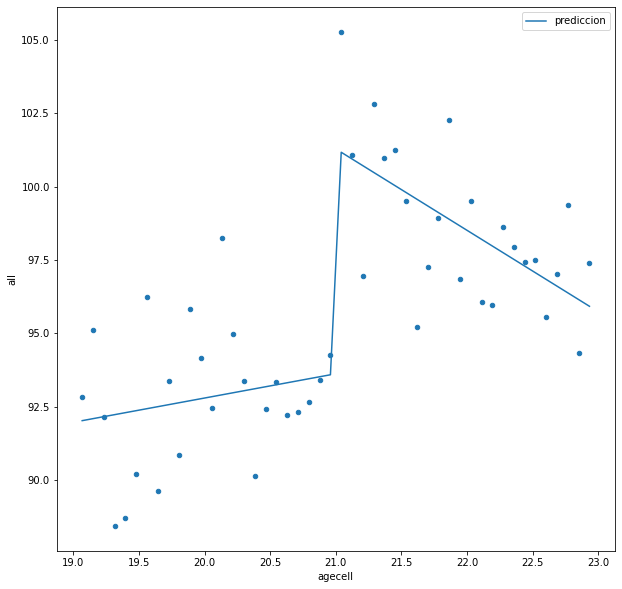

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] #this sets the size of the figure
df2=df[['agecell','all','X']].dropna()
modelo1.predict().shape
ax = df2.plot.scatter(x="agecell", y="all")
df2.assign(prediccion=modelo1.predict()).plot(x="agecell", y="prediccion", ax=ax)


In [19]:
modelo2=regress(['mva','X','mayor21','interaccion'], data=df)

                            OLS Regression Results                            
Dep. Variable:                    mva   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     38.13
Date:                Thu, 27 Aug 2020   Prob (F-statistic):           2.67e-12
Time:                        18:13:37   Log-Likelihood:                -78.586
No. Observations:                  48   AIC:                             165.2
Df Residuals:                      44   BIC:                             172.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          29.9292      0.531     56.390      

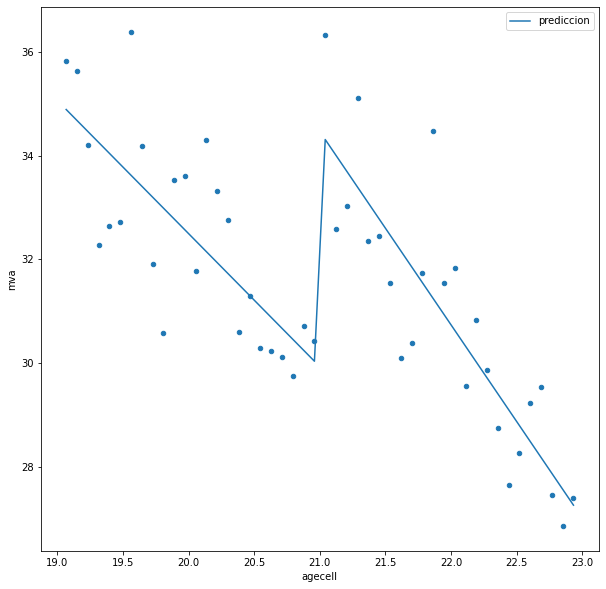

In [21]:
df2=df[['mva','agecell','X']].dropna()
modelo1.predict().shape
ax = df2.plot.scatter(x="agecell", y="mva")
df2.assign(prediccion=modelo1.predict()).plot(x="agecell", y="prediccion", ax=ax)

In [38]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 40.6MB/s 
     |████████████████████████████████| 14.7MB 295kB/s 


In [41]:
import geopandas as gpd

In [42]:
gdf=gpd.read_file('https://github.com/rpasquini/urban-econometrics/blob/master/data/ley_alq_clase.zip?raw=true')

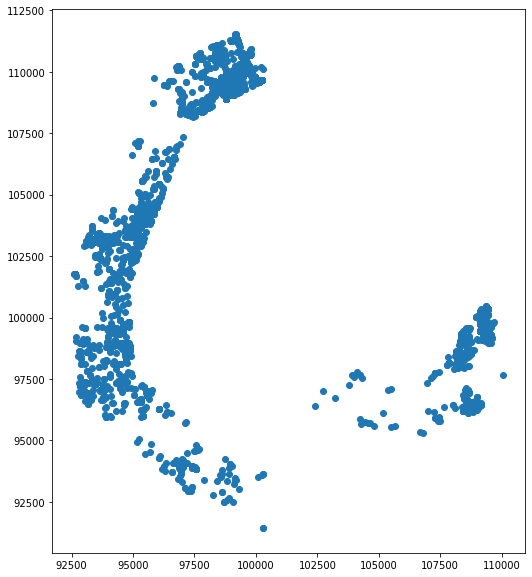

In [52]:
gdf.plot()

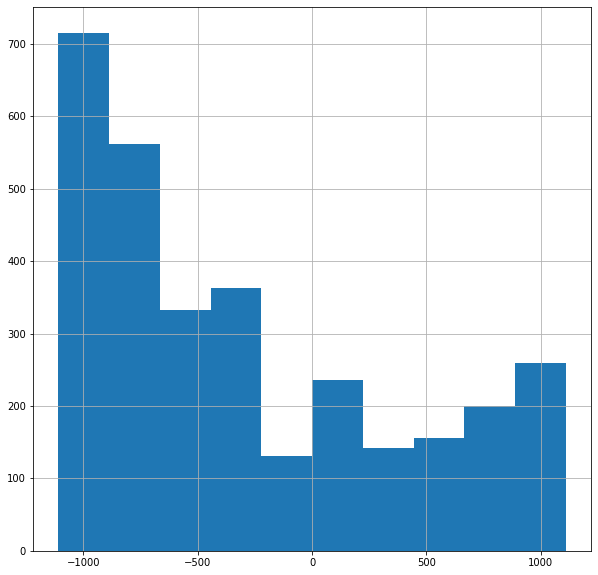

In [53]:
gdf.delta.hist()

In [46]:
gdf2=gdf[['logpricem2', 'delta', 'treatment', 'Tdelta', 'post', 'DD',
       'damenities']]

# Trabajando con R en Colab y combinando R y Python

El siguiente hipervinculo me permite trabajar con un notebook directamente en R usando Colab

[Start R](https://colab.research.google.com/notebook#create=true&language=r)

Pero no voy en este mismo notebook. Para eso voy a usar celdas especiales para R utilizando un prefijo en la celda que le dirá a colab que allí trabajaremos en R.


In [22]:
# activate R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [24]:
%%R
install.packages('rdrobust')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/rdrobust_0.99.9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 45518 bytes (44 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [47]:
import rpy2
from rpy2.robjects import pandas2ri
pandas2ri.activate()
# La siguiente función me permite pasar una base de datos a R
rpy2.robjects.globalenv['gdf2'] = gdf2

In [50]:
%%R
library('rdrobust')
rdrobust(gdf2$logpricem2, gdf2$delta,c=0)
summary(rdrobust(y=gdf2$logpricem2, x=gdf2$delta))

[1] "Mass points detected in the running variable."
[1] "Mass points detected in the running variable."
Call: rdrobust

Number of Obs.                 3098
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                2104         994
Eff. Number of Obs.             69         190
Order est. (p)                   1           1
Order bias  (q)                  2           2
BW est. (h)                168.879     168.879
BW bias (b)                333.780     333.780
rho (h/b)                    0.506       0.506
Unique Obs.                   1296         607

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.703     0.105     6.710     0.000     [0.498 , 0.909]     
        Robust         -         -     6.124     0.000     [0.490 , 0.952]     


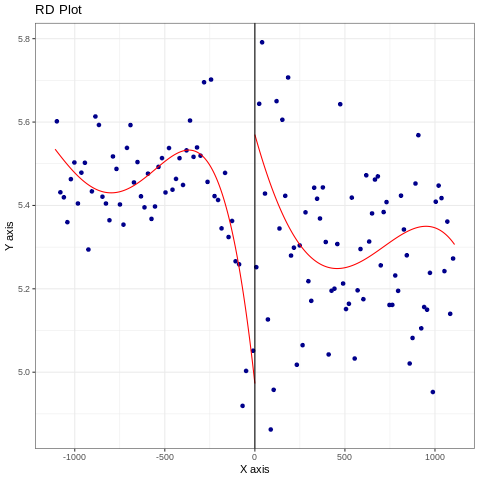

In [51]:
%%R
rdplot(y=gdf2$logpricem2, x=gdf2$delta)